### a) Medindo o tempo de execução

Escreva uma função em Python que calcule a soma dos primeiros N inteiros positivos.

Implemente duas versões:

1. Versão iterativa: utilizando um laço `for`.
2. Versão analítica: utilizando a fórmula direta `S=N(N+1)/2`.
   
Use o comando:

```python
import time
start = time.time()
# código aqui
end = time.time()
print("Tempo de execução:", end - start)
```

para medir o tempo de execução de cada versão para N=10^6,10^7,10^8.

In [1]:
import time

def soma_iterativa(N):
    """
    Calcula a soma 1 + 2 + ... + N usando um laço for.
    Complexidade: O(N)
    """
    total = 0
    for i in range(1, N+1):
        total += i
    return total

def soma_analitica(N):
    """
    Calcula a soma 1 + 2 + ... + N pela fórmula direta.
    Complexidade: O(1)
    """
    return N * (N + 1) // 2

# valores de N a testar
valores_de_N = [10**6, 10**7, 10**8]

for N in valores_de_N:
    # Versão iterativa
    start = time.time()
    resultado_iter = soma_iterativa(N)
    end = time.time()
    print(f"Iterativa (N={N}): tempo = {end - start:.6f} s, soma = {resultado_iter}")

    # Versão analítica
    start = time.time()
    resultado_anal = soma_analitica(N)
    end = time.time()
    print(f"Analítica (N={N}): tempo = {end - start:.6f} s, soma = {resultado_anal}\n")


Iterativa (N=1000000): tempo = 0.050721 s, soma = 500000500000
Analítica (N=1000000): tempo = 0.000002 s, soma = 500000500000

Iterativa (N=10000000): tempo = 0.468155 s, soma = 50000005000000
Analítica (N=10000000): tempo = 0.000003 s, soma = 50000005000000

Iterativa (N=100000000): tempo = 4.626149 s, soma = 5000000050000000
Analítica (N=100000000): tempo = 0.000002 s, soma = 5000000050000000



-----
### b) Comparando abordagens com listas

Crie uma lista com os números de 1 a N
 e calcule a soma:

- Usando um laço for.
- Usando a função `sum()` do Python.

Meça os tempos de execução para N=10^6,10^7
.
Qual abordagem foi mais rápida? Por quê?

In [2]:
import time

for N in [10**6, 10**7]:
    # cria a lista uma única vez
    nums = list(range(1, N + 1))
    
    # soma via laço for
    start = time.time()
    total_loop = 0
    for x in nums:
        total_loop += x
    end = time.time()
    print(f"N={N}: laço for → tempo = {end - start:.6f} s")
    
    # soma via built-in sum()
    start = time.time()
    total_sum = sum(nums)
    end = time.time()
    print(f"N={N}: sum()     → tempo = {end - start:.6f} s\n")


N=1000000: laço for → tempo = 0.183702 s
N=1000000: sum()     → tempo = 0.008480 s

N=10000000: laço for → tempo = 1.520723 s
N=10000000: sum()     → tempo = 0.082648 s



**Resposta**: Ao executar este script, observa-se que a chamada `sum(nums)` é consistentemente mais rápida do que o laço `for`. Isso ocorre porque `sum()` e o iterador range são implementados em C dentro da engine do Python, reduzindo drasticamente o overhead de invocar bytecodes em cada iteração. Já o laço `for` precisa gerenciar em nível de bytecode o acesso ao próximo elemento, o incremento implícito e a atribuição em cada passo, o que resulta em maior custo computacional.

------

### c) Visualizando tempos

Monte um gráfico (usando `matplotlib`) comparando os tempos das diferentes abordagens para valores crescentes de N. Use uma escala log-log para facilitar a análise.

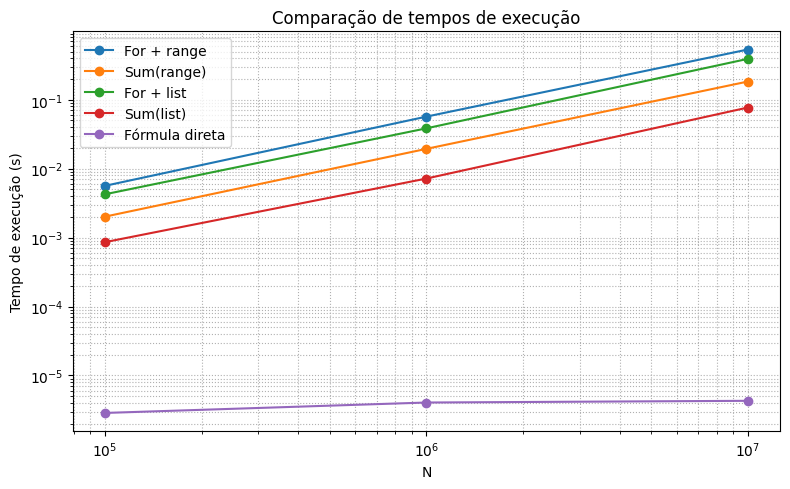

In [4]:
import time
import matplotlib.pyplot as plt

# --- Funções de soma ---
def soma_for_range(N):
    total = 0
    for i in range(1, N + 1):
        total += i
    return total

def soma_sum_range(N):
    return sum(range(1, N + 1))

def soma_for_list(nums):
    total = 0
    for x in nums:
        total += x
    return total

def soma_sum_list(nums):
    return sum(nums)

def soma_formula(N):
    return N * (N + 1) // 2

# --- Valores de N a testar ---
N_vals = [10**5, 10**6, 10**7]

# --- Medição dos tempos ---
times = {
    'For + range': [],
    'Sum(range)': [],
    'For + list': [],
    'Sum(list)': [],
    'Fórmula direta': []
}

for N in N_vals:
    nums = list(range(1, N + 1))  # lista para métodos que usam list

    # for + range
    t0 = time.time()
    soma_for_range(N)
    times['For + range'].append(time.time() - t0)
    
    # sum(range)
    t0 = time.time()
    soma_sum_range(N)
    times['Sum(range)'].append(time.time() - t0)
    
    # for + list
    t0 = time.time()
    soma_for_list(nums)
    times['For + list'].append(time.time() - t0)
    
    # sum(list)
    t0 = time.time()
    soma_sum_list(nums)
    times['Sum(list)'].append(time.time() - t0)
    
    # fórmula direta
    t0 = time.time()
    soma_formula(N)
    times['Fórmula direta'].append(time.time() - t0)

# --- Plotagem ---
plt.figure(figsize=(8,5))
for label, tvals in times.items():
    plt.loglog(N_vals, tvals, marker='o', label=label)

plt.xlabel('N')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação de tempos de execução')
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


------

### d) (Exploração mais desafiadora)
- Implemente uma versão vetorizada da soma utilizando `numpy.arange()` e `numpy.sum()`.
- Compare o tempo de execução com as outras abordagens para valores grandes de N.
- Discuta como a otimização interna do NumPy impacta o desempenho.

In [ ]:
import time
import numpy as np

# --- Funções de soma ---
def soma_for_range(N):
    total = 0
    for i in range(1, N + 1):
        total += i
    return total

def soma_sum_range(N):
    return sum(range(1, N + 1))

def soma_for_list(nums):
    total = 0
    for x in nums:
        total += x
    return total

def soma_sum_list(nums):
    return sum(nums)

def soma_formula(N):
    return N * (N + 1) // 2

def soma_numpy(N):
    arr = np.arange(1, N + 1, dtype=np.int64)
    return np.sum(arr)

# --- Valores de N a testar ---
N_vals = [10**6, 10**7, 10**8]

# --- Medição dos tempos ---
times = {
    'For + range': [],
    'Sum(range)'  : [],
    'For + list'  : [],
    'Sum(list)'   : [],
    'Fórmula'     : [],
    'NumPy (vec)' : []
}

for N in N_vals:
    nums = list(range(1, N + 1))

    t0 = time.time(); soma_for_range(N);      times['For + range'].append(time.time() - t0)
    t0 = time.time(); soma_sum_range(N);      times['Sum(range)'].append(time.time() - t0)
    t0 = time.time(); soma_for_list(nums);     times['For + list'].append(time.time() - t0)
    t0 = time.time(); soma_sum_list(nums);     times['Sum(list)'].append(time.time() - t0)
    t0 = time.time(); soma_formula(N);         times['Fórmula'].append(time.time() - t0)
    t0 = time.time(); soma_numpy(N);           times['NumPy (vec)'].append(time.time() - t0)

header = (
    f"{'N':>10s} | "
    f"{'For+range':>12s} | "
    f"{'Sum(range)':>12s} | "
    f"{'For+list':>12s} | "
    f"{'Sum(list)':>12s} | "
    f"{'Fórmula':>12s} | "
    f"{'NumPy(vec)':>12s}"
)
print(header)
print("-" * len(header))
for idx, N in enumerate(N_vals):
    row = (
        f"{N:10d} | "
        f"{times['For + range'][idx]:12.6f} | "
        f"{times['Sum(range)'][idx]:12.6f} | "
        f"{times['For + list'][idx]:12.6f} | "
        f"{times['Sum(list)'][idx]:12.6f} | "
        f"{times['Fórmula'][idx]:12.6f} | "
        f"{times['NumPy (vec)'][idx]:12.6f}"
    )
    print(row)


         N |    For+range |   Sum(range) |     For+list |    Sum(list) |      Fórmula |   NumPy(vec)
----------------------------------------------------------------------------------------------------
   1000000 |     0.058478 |     0.019402 |     0.057647 |     0.011090 |     0.000005 |     0.003196
  10000000 |     0.487612 |     0.187259 |     0.412452 |     0.082285 |     0.000004 |     0.028671
 100000000 |     6.069818 |     2.144008 |     5.032397 |     0.978846 |     0.000007 |     0.481436


**Resposta**: A versão vetorizada com NumPy desloca completamente o laço de iteração para código compilado em C, usando blocos contíguos de memória e rotinas altamente otimizadas (por vezes aproveitando SIMD e multithreading interno). Isso elimina o overhead de bytecodes Python em cada iteração, tornando-a muito mais rápida que o laço for puro e até superior ao `sum(range(...))` em problemas realmente grandes, apesar do custo inicial de alocar o array. Em todos os casos, a fórmula analítica `N(N+1)/2` permanece a mais veloz (O(1)), seguida em ordem de custo pela mutação vetorizada NumPy (O(N) mas com loop em C), depois `sum(range)` e, por fim, o laço Python com ou sem lista.